In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
import seaborn as sns
import plotly.express as px

In [ ]:
!pip install -q yfinance

In [ ]:
import yfinance as yf

In [ ]:
gol_df = yf.download("GOLL4.SA", start = '2015-01-01')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
display(gol_df)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.97,15.20,14.61,14.99,14.99,901900
2015-01-05,14.90,15.01,14.41,14.85,14.85,1272500
2015-01-06,14.75,15.21,14.65,15.21,15.21,2183500
2015-01-07,15.15,15.33,14.55,14.55,14.55,1846900
2015-01-08,14.41,14.65,14.20,14.27,14.27,1569500
...,...,...,...,...,...,...
2023-09-21,6.60,6.89,6.54,6.69,6.69,10341900
2023-09-22,6.73,6.80,6.41,6.43,6.43,9230100
2023-09-25,6.37,6.38,6.17,6.20,6.20,7059600


- As data são apenas de dias da semana, exceto feriados

In [ ]:
gol_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2174 entries, 2015-01-02 to 2023-09-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2174 non-null   float64
 1   High       2174 non-null   float64
 2   Low        2174 non-null   float64
 3   Close      2174 non-null   float64
 4   Adj Close  2174 non-null   float64
 5   Volume     2174 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 118.9 KB


In [ ]:
gol_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2174.000000,2174.000000,2174.000000,2174.000000,2174.000000,2.174000e+03
mean,14.726155,15.091017,14.340943,14.688450,14.688450,6.295424e+06
std,9.176639,9.345589,8.998699,9.168976,9.168976,5.666358e+06
min,1.160000,1.180000,1.130000,1.160000,1.160000,0.000000e+00
25%,7.670000,7.830000,7.460000,7.640000,7.640000,2.287325e+06
50%,12.740000,13.065000,12.240000,12.550000,12.550000,4.624800e+06
75%,20.472500,21.030001,19.917500,20.457500,20.457500,8.639525e+06
max,43.669998,44.619999,41.310001,43.790001,43.790001,6.724200e+07


- Observando em qual data temos o maior valor de 43.79

In [ ]:
gol_df[gol_df['Close'] >= 43.79]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-01,41.25,44.619999,41.25,43.790001,43.790001,6664200


Observando em qual data temos o menor valor de 1.16

In [ ]:
gol_df[(gol_df['Close'] >= 1.15) & (gol_df['Close'] <= 1.16)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-22,1.2,1.26,1.14,1.16,1.16,3830600


In [ ]:
#Salvando em csv
gol_df.to_csv('gol.csv')

In [ ]:
gol_df2 = pd.read_csv('/content/drive/MyDrive/Finanças/gol.csv')
gol_df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,14.97,15.20,14.61,14.99,14.99,901900
1,2015-01-05,14.90,15.01,14.41,14.85,14.85,1272500
2,2015-01-06,14.75,15.21,14.65,15.21,15.21,2183500
3,2015-01-07,15.15,15.33,14.55,14.55,14.55,1846900
4,2015-01-08,14.41,14.65,14.20,14.27,14.27,1569500
...,...,...,...,...,...,...,...
2161,2023-09-11,6.80,6.80,6.52,6.68,6.68,7802400
2162,2023-09-12,6.65,6.82,6.62,6.71,6.71,7153300
2163,2023-09-13,6.66,6.95,6.61,6.80,6.80,8437100
2164,2023-09-14,6.82,6.87,6.53,6.59,6.59,8577300


##Base de dados com mais ações

In [ ]:
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']

In [ ]:
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
acoes_df

,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
2023-09-21,6.69,2.27,34.980000,2.350000,26.340000,112.599998
2023-09-22,6.43,2.26,34.590000,2.240000,26.420000,112.610001
2023-09-25,6.20,2.39,36.130001,2.150000,26.940001,112.570000


In [ ]:
acoes_df = acoes_df.rename(columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEGE','MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTS','BOVA11.SA': 'BOVA' })

In [ ]:
acoes_df.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998


In [ ]:
acoes_df.isnull().sum()

GOL      0
CVC      0
WEGE     0
MGLU     0
TOTS     0
BOVA    27
dtype: int64

In [ ]:
acoes_df.shape

(2174, 6)

Apagando registros nulos

In [ ]:
acoes_df.dropna(inplace=True)

In [ ]:
acoes_df.isnull().sum()

GOL     0
CVC     0
WEGE    0
MGLU    0
TOTS    0
BOVA    0
dtype: int64

transformando em arquivo

In [ ]:
acoes_df.to_csv('acoes.csv')

In [ ]:
acoes_df = pd.read_csv('acoes.csv')
acoes_df

,Unnamed: 0,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...,...
2142,2142,2023-09-21,6.69,2.27,34.980000,2.350000,26.340000,112.599998
2143,2143,2023-09-22,6.43,2.26,34.590000,2.240000,26.420000,112.610001
2144,2144,2023-09-25,6.20,2.39,36.130001,2.150000,26.940001,112.570000
2145,2145,2023-09-26,6.12,2.40,36.080002,2.100000,26.410000,110.650002


In [ ]:
acoes_df.columns[1:]

Index(['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA'], dtype='object')

In [ ]:
acoes_df.describe()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000
mean,14.611896,25.607613,18.901131,6.502138,18.888310,84.098277
std,9.162987,16.833452,13.393642,7.400209,9.481912,24.227244
min,1.160000,2.200000,4.942307,0.030585,7.156402,36.450001
25%,7.620000,13.700000,6.911538,0.696425,10.185647,61.755001
50%,12.400000,20.219999,9.900000,3.720000,14.290000,90.800003
75%,20.320000,40.820000,33.680000,9.115000,28.100000,105.509998
max,43.790001,64.800003,46.105000,27.450001,40.599998,125.750000


##Visualização

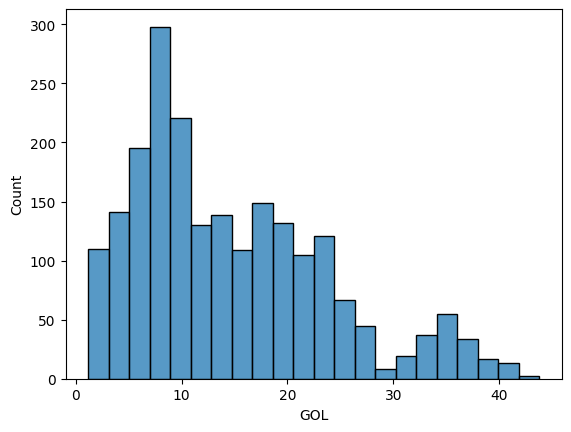

In [ ]:
sns.histplot(acoes_df['GOL']); #Colocar o ponto e virgula para retirar os avisos da biblioteca

- Eixo X em reais (R$) em todos os gráficos

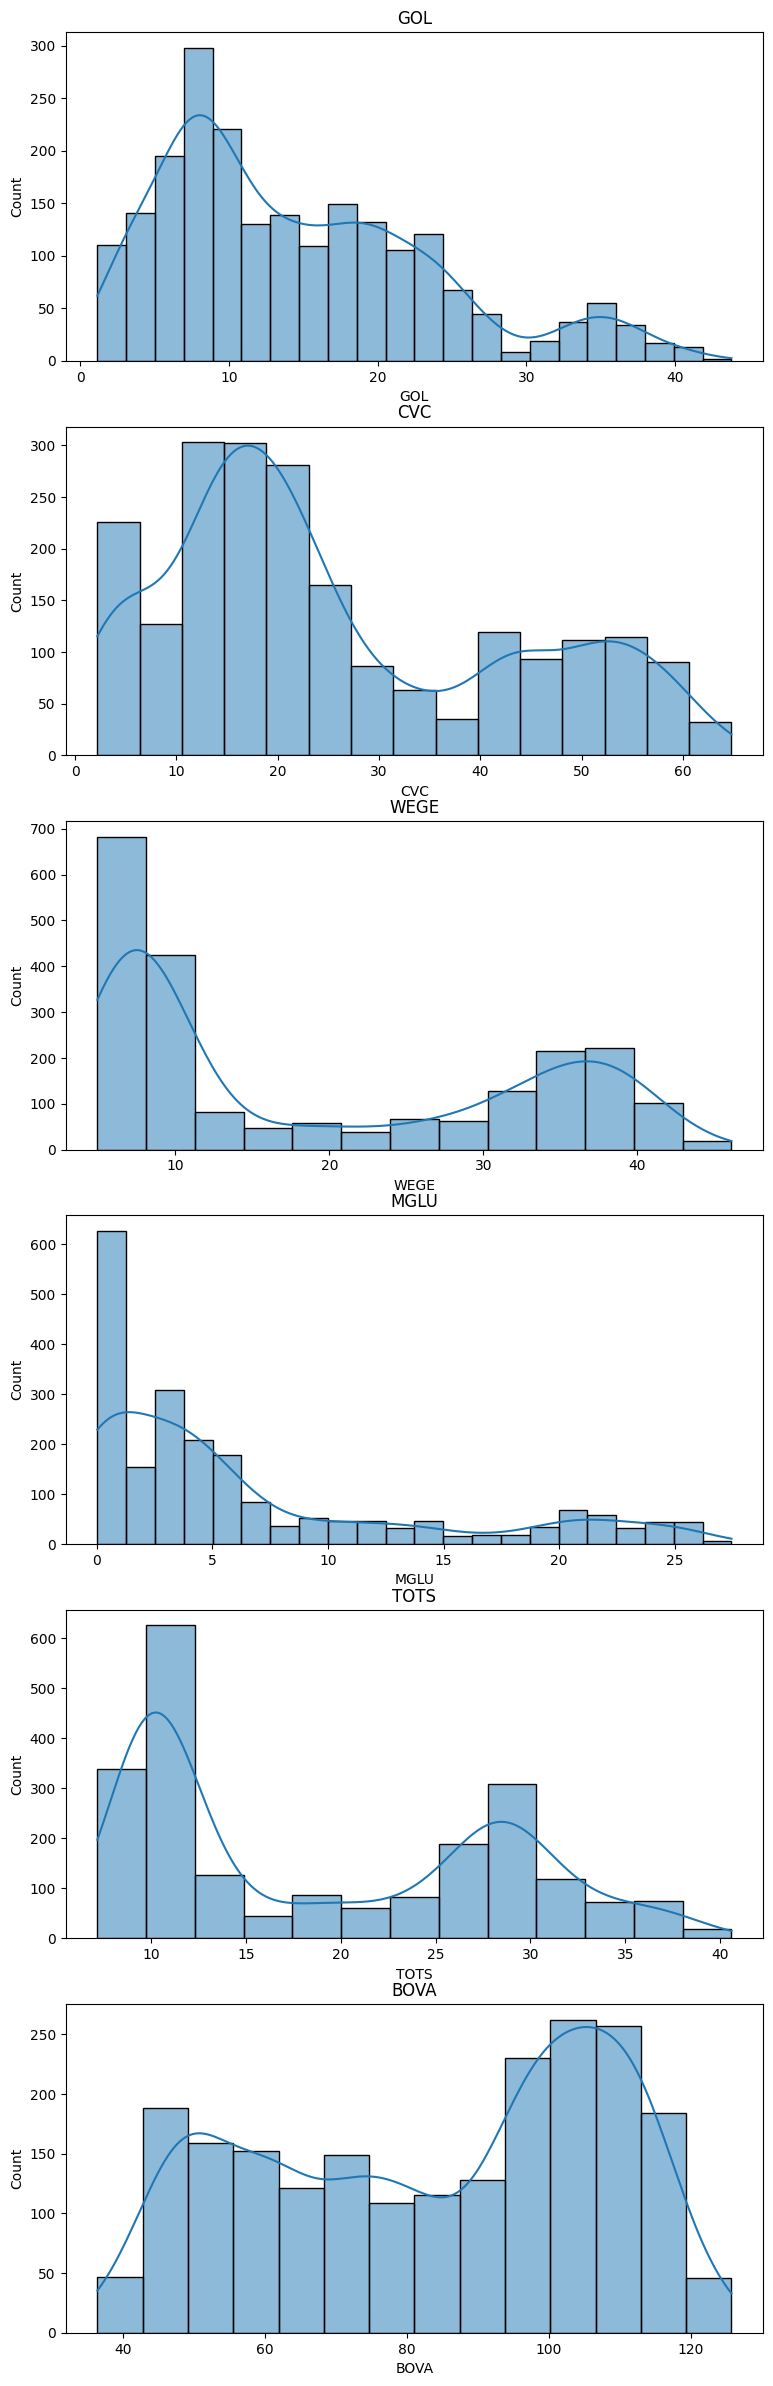

In [ ]:
plt.figure(figsize = (9,35))
i = 1 #para ignorar a primeira coluna do df que é a data
for i in np.arange(1 , len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1) #7 linhas; 1 coluna; indice do grafico
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
  plt.title(acoes_df.columns[i])

##Boxplot

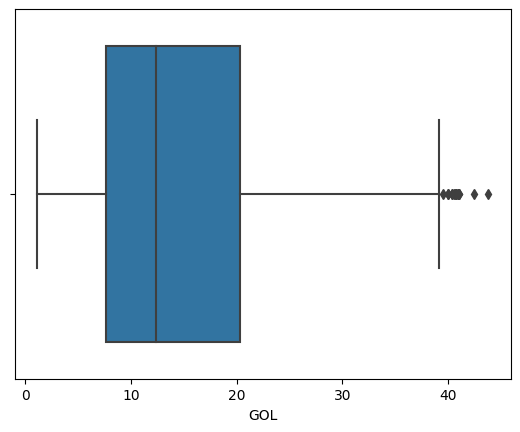

In [ ]:
sns.boxplot(x = acoes_df['GOL']);

In [ ]:
acoes_df['GOL'].describe()

count    2147.000000
mean       14.611896
std         9.162987
min         1.160000
25%         7.620000
50%        12.400000
75%        20.320000
max        43.790001
Name: GOL, dtype: float64

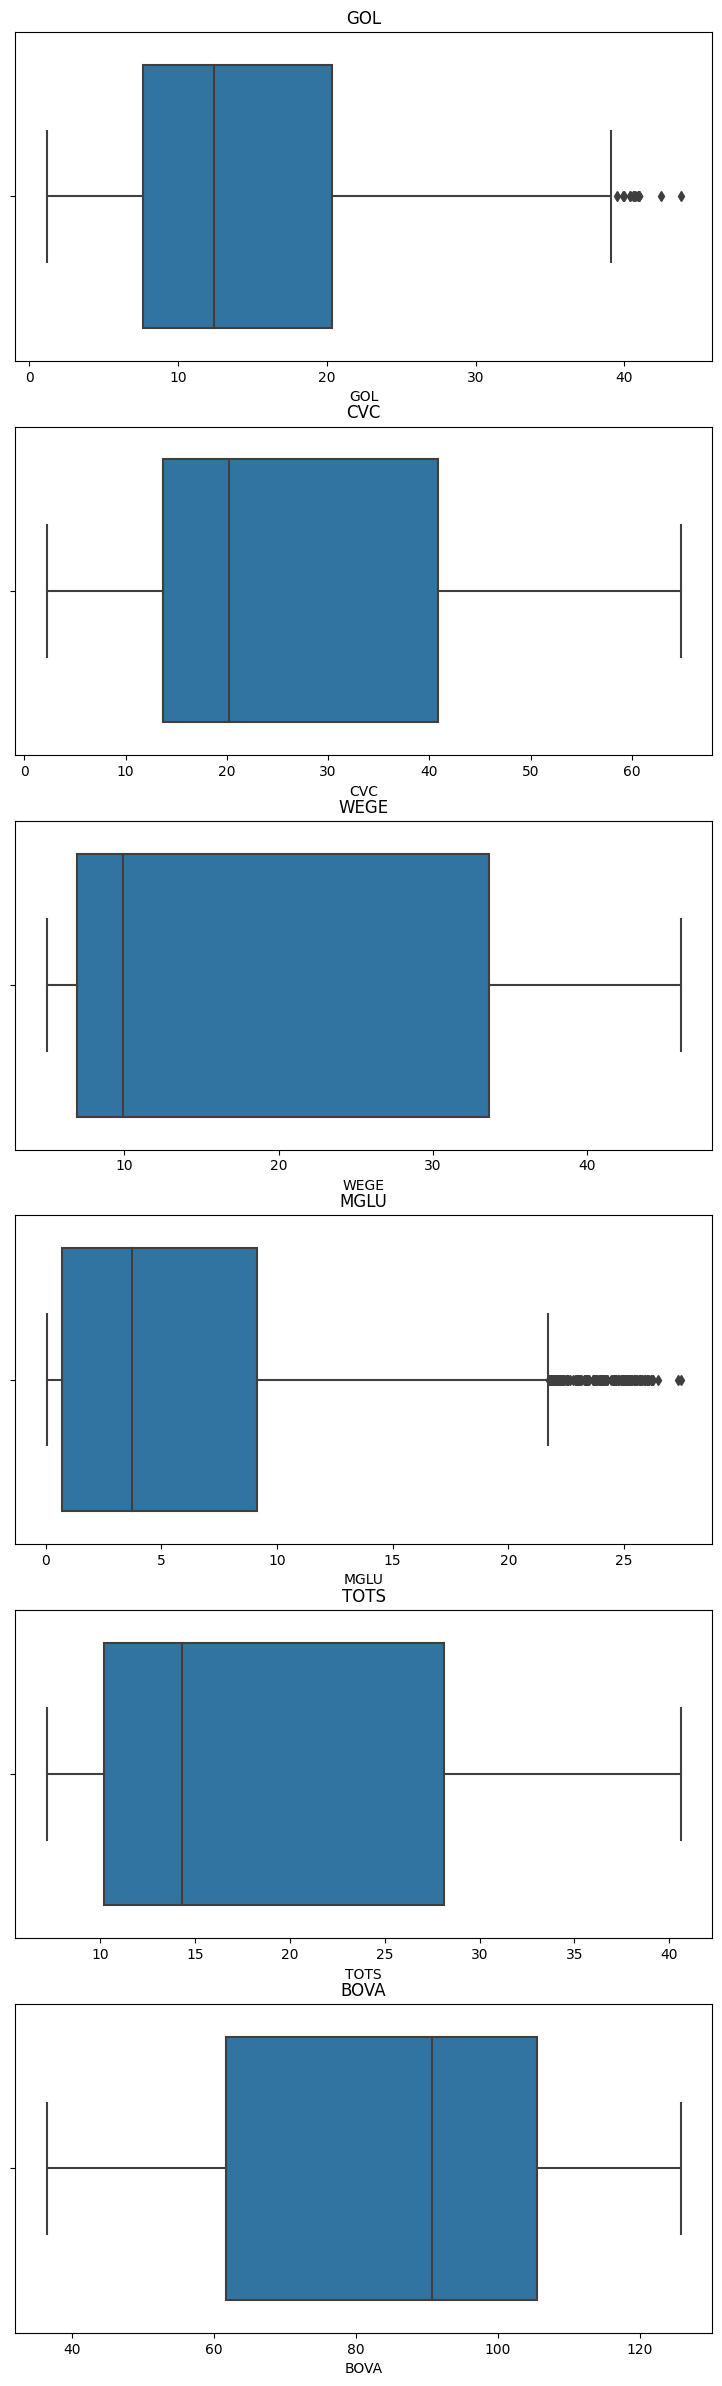

In [ ]:
plt.figure(figsize = (9,35))
i = 1 #para ignorar a primeira coluna do df que é a data
for i in np.arange(1 , len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1) #7 linhas; 1 coluna; indice do grafico
  sns.boxplot(x = acoes_df[acoes_df.columns[i]])
  plt.title(acoes_df.columns[i])

- Houve uma valorização muito alta e repentina na MAGALU a julgar pelo alto número de outliers

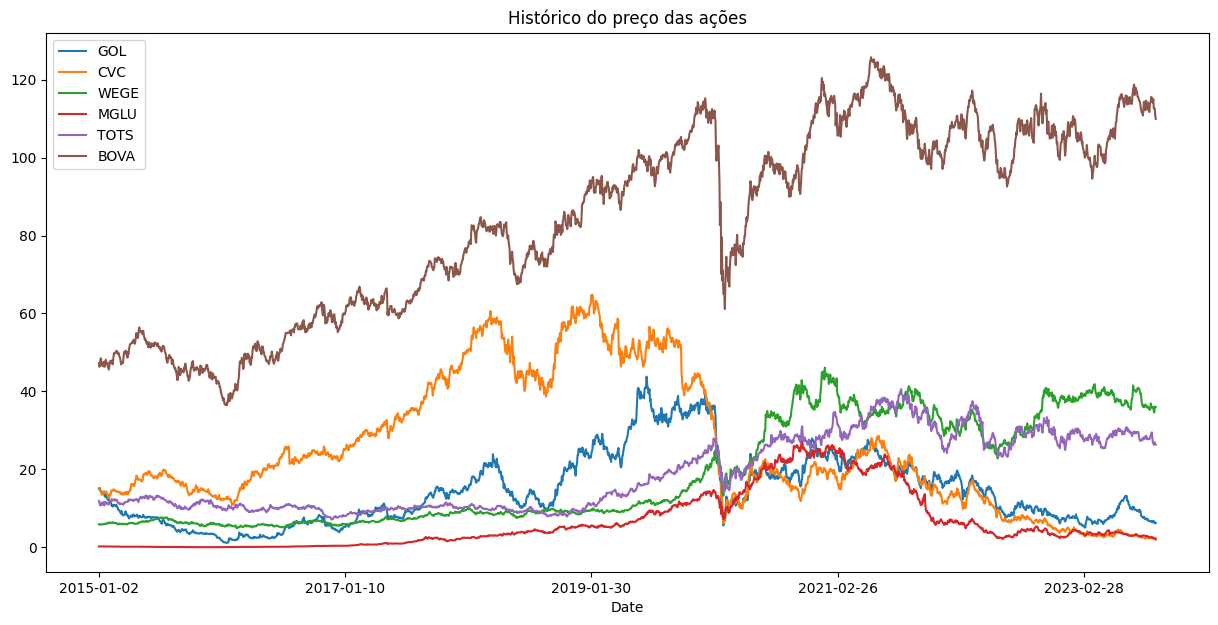

In [ ]:
acoes_df.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações');

## Normalização da base de dados para uma comparação mais justa entre os valores

- Para medir o crescimento de todas as ações e saber qual comprar para ter um melhor lucro, dividimos todos os valores da base pelo primeiro valor registrado (os valores do dia 2015-01-02)

In [ ]:
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

In [ ]:
acoes_df_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449
...,...,...,...,...,...,...,...
2142,2023-09-21,0.446298,0.149342,5.905715,10.093981,2.211457,2.382565
2143,2023-09-22,0.428953,0.148684,5.839871,9.621497,2.218173,2.382776
2144,2023-09-25,0.413609,0.157237,6.099871,9.234919,2.261832,2.381930
2145,2023-09-26,0.408272,0.157895,6.091430,9.020153,2.217334,2.341304


- Percebe-se que todos os primeiros valores correspondem a 1 pois é o resultado da divisão do primeiro valor por ele mesmo e assim ocorre com os demais valores

- Todos os outros valores representam o lucro ou a perda de pessoas que venderam ações nos respectivos dias (ações que foram compradas no dia 02/01/2015)

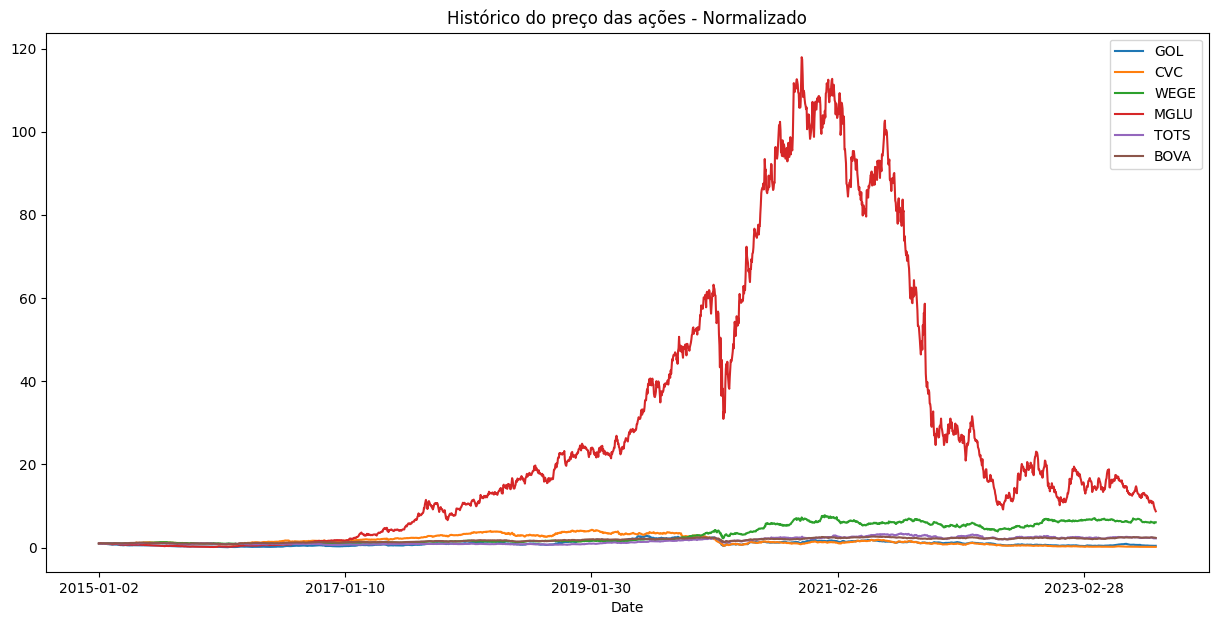

In [ ]:
acoes_df_normalizado.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações - Normalizado');

## Gráficos interativos

In [ ]:
figura = px.line(title = ('Histórico do preço das ações'))
for i in acoes_df.columns[1:]:
  figura.add_scatter(x = acoes_df['Date'], y = acoes_df[i], name = i)
figura.show()

In [ ]:
figura = px.line(title = ('Histórico do preço das ações - Normalizado'))
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()